In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt
import sys

#Leemos la entrada de los datos para cargar el dataset
df = pd.read_csv("C:/Users/Angel/Downloads/cal_housing.csv", sep=',', engine='python')
X = df.drop(columns=['medianHouseValue'],axis = 1).values
y = df['medianHouseValue'].values 
class validation_set:
	def __init__(self, X_train, y_train):
		self.X_train = X_train
		self.y_train = y_train

class test_set:
	def __init__(self, X_test, y_test):
		self.X_test = X_test
		self.y_test = y_test

class data_set:
	def __init__(self, validation_set, test_set):
		self.validation_set = validation_set
		self.test_set = test_set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., shuffle= False , random_state=1)

ValueError: x and y must be the same size

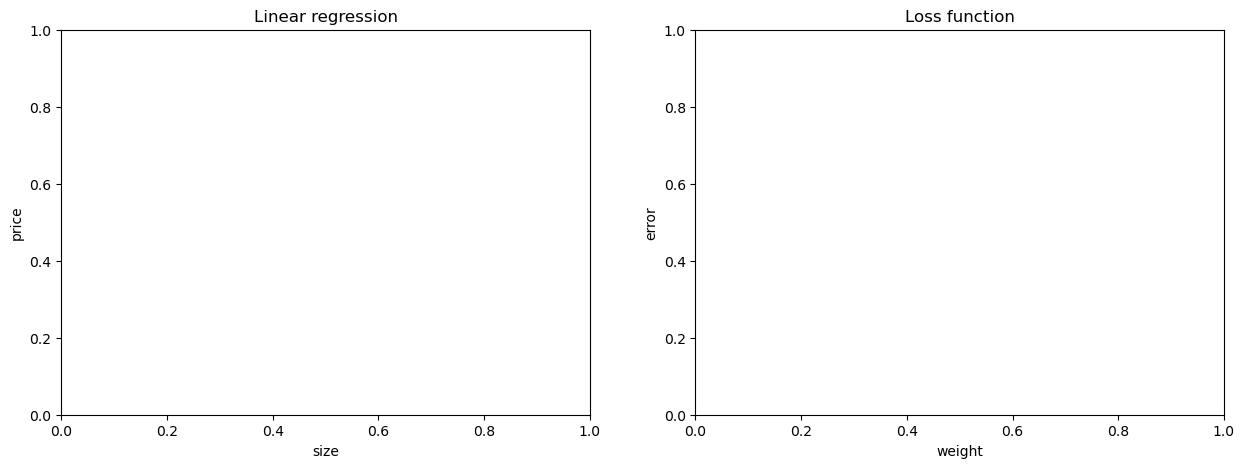

In [5]:
def F(w, X, y):
	return sum((w * x - y)**2 for x, y in zip(X, y))/len(y)


def dF(w, X, y):
	return sum(2*(w * x - y) * x for x, y in zip(X, y))/len(y)


def print_line(points, w, iteration, line_color = None, line_style = 'dotted'):
	list_x = []
	list_y = []
	for index, tuple in enumerate(points):
		x = tuple[0]
		y = x * w
		list_x.append(x)
		list_y.append(y)
	ax1.text(x,y, iteration, horizontalalignment='right')
	ax1.plot(list_x, list_y, color = line_color, linestyle= line_style)

if __name__=='__main__':
	X = X_train
	y = y_train
	list_error = []
	list_w = []	
	iterations = 20
	
	fig = plt.figure(figsize=(15, 5))
	ax1 = fig.add_subplot(1, 2, 1)
	ax1.set_title("Linear regression")
	ax1.set(xlabel="size", ylabel="price")
	ax2 = fig.add_subplot(1, 2, 2)
	ax2.set_title("Loss function")
	ax2.set(xlabel="weight", ylabel="error")
	
	ax1.scatter(X, y)
	
	w= 0
	alpha = 0.0001
	# ~ alpha = 0.05 #Efecto similar al de no sacar el promedio
	for t in range(iterations):
		error = F(w, X, y)
		gradient = dF(w, X, y)
		print ('gradient = {}'.format(gradient))
		ax2.scatter(w, error)
		ax2.text(w, error, t, horizontalalignment='right')
		list_w.append(w)
		list_error.append(error)
		
		w = w - alpha * gradient
		print ('iteration {}: w = {}, F(w) = {}'.format(t, w, error))
		print_line(zip(X, y), w, t)
			
	print_line(zip(X, y), w, t, 'red', 'solid')
	ax2.plot(list_w, list_error, color = 'red', linestyle = 'solid')
	
	plt.show()